### Descripción del proceso de unión de los datasets de metadatos y de reviews:

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Cargamos los archivos json y los concatenamos:

In [2]:


file_paths = ['Google Maps/reviews-estados/review-Nevada/{}.json'.format(i) for i in range(1, 13)]

dfs = [pd.read_json(file_path, lines=True) for file_path in file_paths]

#Concatenamos todos los datasets:
dfc = pd.concat(dfs, axis=0, join='inner')

Estimamos conveniente realizar una combinación de los metadatos con los reviews. Para ello tomamos los grupos de
metadatos que habíamos separado previamente para facilitar la manipulación: 

In [4]:
#Cargamos el dataset del metadata1
metadata1= pd.read_parquet('Google Maps/metadata-sitios/metadata1.parquet')


Realizamos una combinación entre los dataframes:

In [5]:

NV1 = pd.merge(dfc, metadata1, on='gmap_id')

In [6]:
# Guardamos el dataframe resultante en un archivo .parquet
NV1.to_parquet('NV1.parquet', index=False)

In [7]:
#Liberamos memoria:
del NV1, metadata1

In [8]:

#Cargamos la información del metadata2
metadata2= pd.read_parquet('Google Maps/metadata-sitios/metadata2.parquet')

In [9]:
#Realizamos una combinación entre los dataframes
NV2 = pd.merge(dfc, metadata2, on='gmap_id')

In [10]:
NV2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256627 entries, 0 to 256626
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           256627 non-null  float64
 1   name_x            256627 non-null  object 
 2   time              256627 non-null  int64  
 3   rating            256627 non-null  int64  
 4   text              159832 non-null  object 
 5   pics              11168 non-null   object 
 6   resp              31838 non-null   object 
 7   gmap_id           256627 non-null  object 
 8   name_y            256627 non-null  object 
 9   address           255866 non-null  object 
 10  description       139631 non-null  object 
 11  latitude          256627 non-null  float64
 12  longitude         256627 non-null  float64
 13  category          256616 non-null  object 
 14  avg_rating        256627 non-null  float64
 15  num_of_reviews    256627 non-null  int64  
 16  price             11

In [12]:
# Guardamos el dataframe resultante en un archivo .parquet
NV2.to_parquet('NV2.parquet', index=False)

In [13]:
#Liberamos memoria
del NV2, metadata2

In [3]:
#leemos los datos del metadata3
metadata3= pd.read_parquet('Google Maps/metadata-sitios/metadata3.parquet')

In [4]:
#Realizamos una combinación entre los dataframes
NV3 = pd.merge(dfc, metadata3, on='gmap_id')

In [5]:
NV3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179747 entries, 0 to 179746
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           179747 non-null  float64
 1   name_x            179747 non-null  object 
 2   time              179747 non-null  int64  
 3   rating            179747 non-null  int64  
 4   text              111242 non-null  object 
 5   pics              6765 non-null    object 
 6   resp              26300 non-null   object 
 7   gmap_id           179747 non-null  object 
 8   name_y            179747 non-null  object 
 9   address           179285 non-null  object 
 10  description       41502 non-null   object 
 11  latitude          179747 non-null  float64
 12  longitude         179747 non-null  float64
 13  category          179690 non-null  object 
 14  avg_rating        179747 non-null  float64
 15  num_of_reviews    179747 non-null  int64  
 16  price             47

In [6]:
# Guardamos el dataframe resultante en un archivo .parquet
NV3.to_parquet('NV3.parquet', index=False)

In [3]:
df_nv = pd.concat([pd.read_parquet(f'NV{i}.parquet') for i in range(1, 4)], axis=0, join='inner')

Guardamos el dataset final correspondiente al estado de Nevada: 

In [4]:
df_nv.to_parquet('df_nv.parquet', index=False)

___________________________________________________________________________________________________________

### Análisis Exploratorio de Datos - Google reviews:Estado de Nevada

En el presente notebook se realizará un análisis exploratorio de los datos de reviews de negocios relacionados al hospedaje realizadas en Google Maps en el estado de Nevada:


Realizamos la carga del dataset de Nevada concatenado previamente:

In [40]:
#Cargamos el dataset 
df_nv= pd.read_parquet('df_nv.parquet')

In [4]:
#Verificamos la infomación y el tamaño del dataframe
df_nv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482596 entries, 0 to 482595
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_id           482596 non-null  float64
 1   name_x            482596 non-null  object 
 2   time              482596 non-null  int64  
 3   rating            482596 non-null  int64  
 4   text              300916 non-null  object 
 5   pics              19435 non-null   object 
 6   resp              66383 non-null   object 
 7   gmap_id           482596 non-null  object 
 8   name_y            482596 non-null  object 
 9   address           480769 non-null  object 
 10  description       186592 non-null  object 
 11  latitude          482596 non-null  float64
 12  longitude         482596 non-null  float64
 13  category          482528 non-null  object 
 14  avg_rating        482596 non-null  float64
 15  num_of_reviews    482596 non-null  int64  
 16  price             16

Primero analizamos las columnas 'name_x', 'pics', 'resp', 'MISC' y 'url' y decidimos eliminarlas por los siguientes motivos:
'name_x': Nombre de usuario irrelevante para nuestro estudio.
'pics'  : Corresponden a fotografías tomadas por los usuarios. La eliminaremos ya que no las consideramos necesarias.
'resp'  : Respuesta del establecimiento a la review del usuario. El numero de datos es muy pequeño.
'MISC'  : Opciones del servicio. No son relevantes en nuestro estudio.
'gmap_id':  Códigos de google que no tienen significado relevante.
'relative_results': Códigos de google que no tienen significado relevante.
'url'   : Dirección web del establecimiento comercial. No relevante.


In [41]:
#Eliminamos las columnas que no se usarán en el análisis: 

df_nv= df_nv.drop(['name_x','pics', 'resp', 'MISC', 'url', 'relative_results', 'gmap_id', 'hours'], axis=1)

Verificamos la cantidad de valores nulos:

In [42]:
null_counts = df_nv.isnull().sum()
print(null_counts)

user_id                0
time                   0
rating                 0
text              181680
name_y                 0
address             1827
description       296004
latitude               0
longitude              0
category              68
avg_rating             0
num_of_reviews         0
price             317555
hours              40926
state              37249
dtype: int64


De acuerdo a lo anterior, existe una gran cantidad de valores faltantes en la columna "text", que contiene los comentarios de las reviews realizadas por el usuario. Se decide mantener las mismas, ya que tal vez podamos implementar algún método para completar los mismos a través del rating ingresado por el usuario De igual manera para las columnas "description", "address", "price" y "state". 



Desanidamos la columna 'category':

In [43]:
df_nv = df_nv.explode('category')
df_nv = df_nv.dropna(subset=['category'])

In [ ]:
# Se controla que no existan filas duplicadas:
df_nv.duplicated().sum()

In [59]:
# Se eliminan valores duplicados:
df_nv= df_nv.drop_duplicates()
df_nv.shape

(1375620, 14)

Llenamos los datos faltantes de la columna "price" por 'no price'

In [60]:
df_nv['price'].fillna('No Price', inplace=True)


Cambiamos el tipo de dato de la columna time a datetime:

In [48]:
df_nv['time'] = pd.to_datetime(df_nv['time'], unit='ms')

In [61]:
df_nv.head()

,user_id,time,rating,text,business name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,state
0,1.028432e+20,2021-06-03 17:15:04.476,5,No frills smaller coffee counter in the corner...,Castle Coffee,"Castle Coffee, Excalibur Hotel and Casino, 385...",None,36.099575,-115.176338,Coffee shop,3.2,24,No Price,Open ⋅ Closes 2PM
2,1.149544e+20,2019-11-07 20:43:33.820,1,Save yourself the frustration and just ignore ...,Castle Coffee,"Castle Coffee, Excalibur Hotel and Casino, 385...",None,36.099575,-115.176338,Coffee shop,3.2,24,No Price,Open ⋅ Closes 2PM
4,1.165234e+20,2018-01-06 15:06:03.362,3,I passed two Starbucks in order to get to this...,Castle Coffee,"Castle Coffee, Excalibur Hotel and Casino, 385...",None,36.099575,-115.176338,Coffee shop,3.2,24,No Price,Open ⋅ Closes 2PM
6,1.033041e+20,2017-09-23 22:46:02.095,3,It does the job and is my preference over the ...,Castle Coffee,"Castle Coffee, Excalibur Hotel and Casino, 385...",None,36.099575,-115.176338,Coffee shop,3.2,24,No Price,Open ⋅ Closes 2PM
8,1.141624e+20,2016-07-12 04:46:11.892,3,None,Castle Coffee,"Castle Coffee, Excalibur Hotel and Casino, 385...",None,36.099575,-115.176338,Coffee shop,3.2,24,No Price,Open ⋅ Closes 2PM


In [62]:
df_nv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1375620 entries, 0 to 482595
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   user_id         1375620 non-null  float64       
 1   time            1375620 non-null  datetime64[ns]
 2   rating          1375620 non-null  int64         
 3   text            841737 non-null   object        
 4   business name   1375620 non-null  object        
 5   address         1370277 non-null  object        
 6   description     707912 non-null   object        
 7   latitude        1375620 non-null  float64       
 8   longitude       1375620 non-null  float64       
 9   category        1375620 non-null  object        
 10  avg_rating      1375620 non-null  float64       
 11  num_of_reviews  1375620 non-null  int64         
 12  price           1375620 non-null  object        
 13  state           1317712 non-null  object        
dtypes: datetime64[ns](1), fl

In [51]:
# Renombramos la columna "name_y" por "business name"
df_nv.rename(columns={'name_y': 'business name'}, inplace=True)

Realizamos un filtro de negocios relacionados con la hotelería, contenidos en la columna 'category'

In [63]:
#Creamos una lista con las palabras clave
keywords = ['Hotel', 'Hostel', 'Motel', 'Resort', 'Inn', 'Lodging', 'Lodge', 'Accommodation', 
            'Bed and Breakfast (B&B)', 'Guesthouse', 'Boutique Hotel', 'Vacation Rental', 
            'Homestay', 'Cabin', 'Suites', 'Spa Resort', 'Boutique Inn', 'Extended Stay', 
            'Boutique Accommodation', 'Retreat']


# Se realiza la busqueda de coincidencias exactas de las palabras clave
import re
pattern = r'\b(?:' + '|'.join(re.escape(keyword) for keyword in keywords) + r')\b'


# Creamos un dataframe de hoteles unicamente
nv_hotels = df_nv[df_nv['category'].str.contains(pattern, case=False, na=False)]



In [53]:
nv_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4137 entries, 8245 to 464140
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         4137 non-null   float64       
 1   time            4137 non-null   datetime64[ns]
 2   rating          4137 non-null   int64         
 3   text            2601 non-null   object        
 4   business name   4137 non-null   object        
 5   address         4137 non-null   object        
 6   description     237 non-null    object        
 7   latitude        4137 non-null   float64       
 8   longitude       4137 non-null   float64       
 9   category        4137 non-null   object        
 10  avg_rating      4137 non-null   float64       
 11  num_of_reviews  4137 non-null   int64         
 12  price           4137 non-null   object        
 13  hours           846 non-null    object        
 14  state           846 non-null    object        
dtypes: d

In [54]:
df_nv.describe()

,user_id,time,rating,latitude,longitude,avg_rating,num_of_reviews
count,1.434015e+06,1434015,1.434015e+06,1.434015e+06,1.434015e+06,1.434015e+06,1.434015e+06
mean,1.093215e+20,2019-04-06 00:58:48.770770432,4.240510e+00,3.681042e+01,-1.160159e+02,4.216737e+00,1.132473e+03
min,1.000000e+20,2005-06-10 00:00:00,1.000000e+00,3.512886e+01,-1.199955e+02,1.100000e+00,6.000000e+00
25%,1.047944e+20,2018-05-28 01:54:03.039000064,4.000000e+00,3.608886e+01,-1.152979e+02,4.000000e+00,8.300000e+01
50%,1.093208e+20,2019-05-07 05:44:51.280999936,5.000000e+00,3.615689e+01,-1.151903e+02,4.300000e+00,2.380000e+02
75%,1.138774e+20,2020-04-05 21:15:48.536000,5.000000e+00,3.624805e+01,-1.151238e+02,4.600000e+00,1.153000e+03
max,1.184467e+20,2021-09-07 10:09:29.993000,5.000000e+00,4.198962e+01,-1.140472e+02,5.000000e+00,9.998000e+03
std,5.277796e+18,NaN,1.204390e+00,1.378298e+00,1.764502e+00,4.774931e-01,2.044647e+03


In [28]:
import matplotlib.pyplot as plt

In [64]:
nv_hotels.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3907 entries, 8245 to 464140
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3907 non-null   float64       
 1   time            3907 non-null   datetime64[ns]
 2   rating          3907 non-null   int64         
 3   text            2383 non-null   object        
 4   business name   3907 non-null   object        
 5   address         3907 non-null   object        
 6   description     213 non-null    object        
 7   latitude        3907 non-null   float64       
 8   longitude       3907 non-null   float64       
 9   category        3907 non-null   object        
 10  avg_rating      3907 non-null   float64       
 11  num_of_reviews  3907 non-null   int64         
 12  price           3907 non-null   object        
 13  state           766 non-null    object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(7)
me

In [65]:
nv_hotels.head()

,user_id,time,rating,text,business name,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,state
8245,1.107179e+20,2020-01-03 03:03:00.050,5,Clean rooms no bugs or rodents great price and...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None
8246,1.040384e+20,2018-07-30 18:58:30.945,4,Very good for a Reno motel. Clean and family ...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None
8247,1.063300e+20,2018-06-18 02:48:23.106,4,Owner is very helpful to everyone he deals wit...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None
8248,1.089285e+20,2018-08-23 06:16:42.832,5,I give this place 5 stars because Harry and hi...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None
8249,1.175148e+20,2019-01-03 04:13:34.728,3,It keeps you warm and it's as clean as you'd e...,Sunset Motel,"Sunset Motel, 2091 W 4th St, Reno, NV 89503",None,39.523581,-119.837903,Motel,3.0,38,No Price,None


In [66]:
categories = nv_hotels['category'].unique()

# Imprimir los registros únicos
print(categories)

['Motel' 'Extended stay hotel' 'Hotel' 'Resort hotel' 'Lodging'
 'Pet friendly accommodation' 'Indoor lodging' 'Ski resort' 'Lodge'
 'Hot spring hotel' 'Group accommodation' 'Inn']


In [68]:
#top de los hoteles con mejores calificaciones
media_rating = nv_hotels.groupby('business name')['rating'].mean()
top_15 = media_rating.sort_values(ascending=False).head(15)
print(top_15)

business name
Fido's Kitchen                                4.950000
Allure Floatspa                               4.900000
World Famous Mustang Ranch                    4.823529
DEFY Sparks                                   4.785714
Lake Las Vegas                                4.709677
Octavius Tower Caesars                        4.705882
Stagecoach Chairlift - Heavenly Ski Resort    4.666667
Winters Creek Lodge                           4.638889
Historic Carson Hot Springs                   4.634146
Lee Canyon                                    4.627937
Aria North Valet                              4.592593
Dolphin Court Salon & Day Spa                 4.575000
Spa at Grand Sierra Resort                    4.560000
Flamingo casino Las Vegas                     4.444444
Bonnie Springs Motel                          4.444444
Name: rating, dtype: float64


### TOP 10 DE LOS HOTELES MÁS VISITADOS

In [69]:
conteo_gmap_id = nv_hotels['business name'].value_counts()
top_10_gmap_id = conteo_gmap_id.nlargest(10)

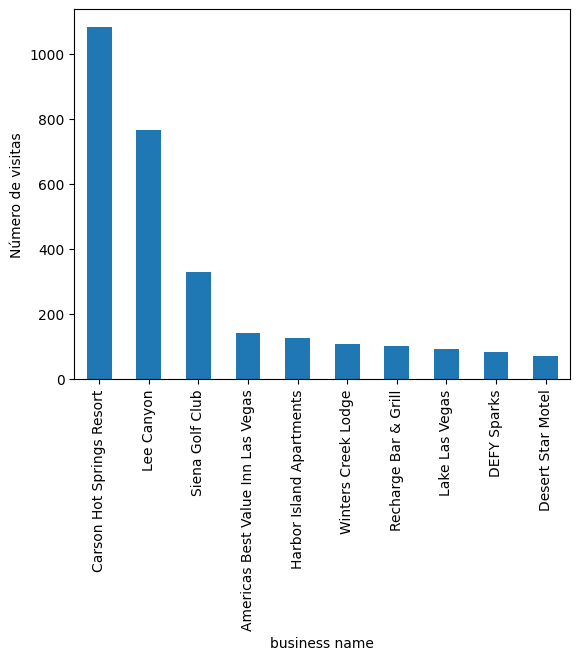

In [70]:
#Grafica de los hoteles mas visitados.
top_10_gmap_id.plot.bar()
plt.xlabel('business name')
plt.ylabel('Número de visitas')
plt.show()

### TOP 10 DE LAS CATEGORÍAS DE HOTEL MÁS VISITADOS

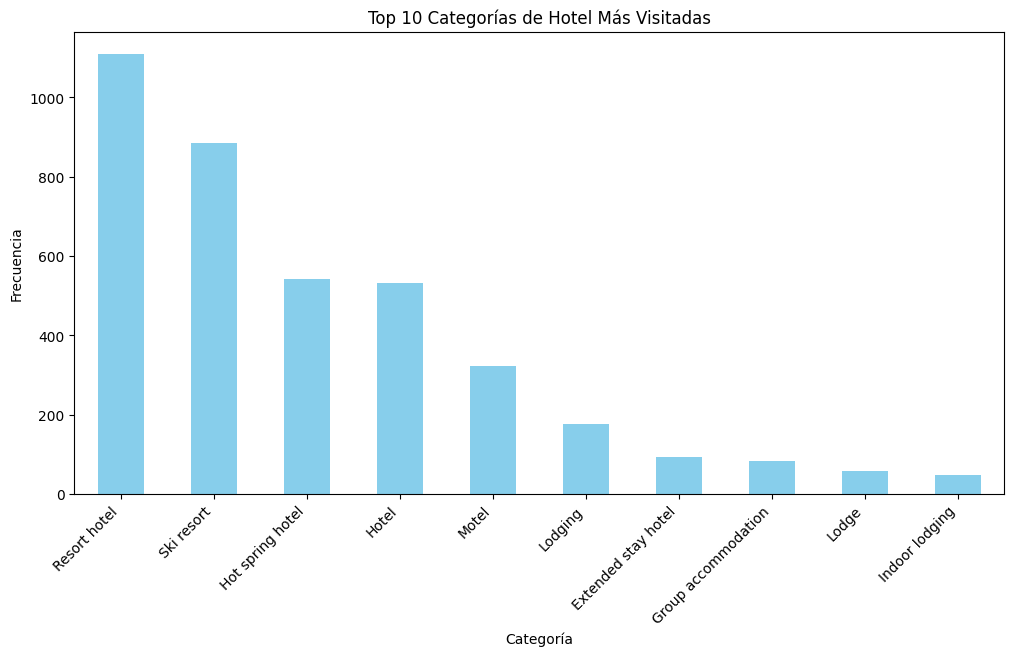

In [71]:
#Contamos la frecuencia de cada categoría contenida en el DataFrame filtrado
category_counts = nv_hotels['category'].value_counts()

# Seleccionamos las 10 categorías más frecuentes para graficarlos en el histograma
top_categories = category_counts.head(10)

# Se crear el histograma
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categorías de Hotel Más Visitadas')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.show()

### HISTOGRAMA DE VISITAS DE CADA CATEGORÍA POR AÑO

C:\Users\Coder\AppData\Local\Temp\ipykernel_7332\2329634644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nv_hotels['time'] = pd.to_datetime(nv_hotels['time'])


<Figure size 1200x600 with 0 Axes>

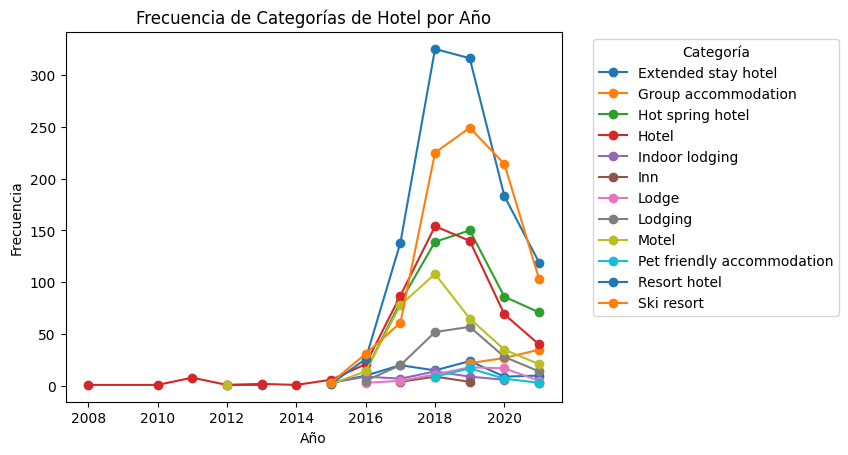

In [72]:
nv_hotels['time'] = pd.to_datetime(nv_hotels['time'])

# Agruparmos por año y contar la frecuencia de cada categoría
grouped_by_year = nv_hotels.groupby([nv_hotels['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1200x600 with 0 Axes>

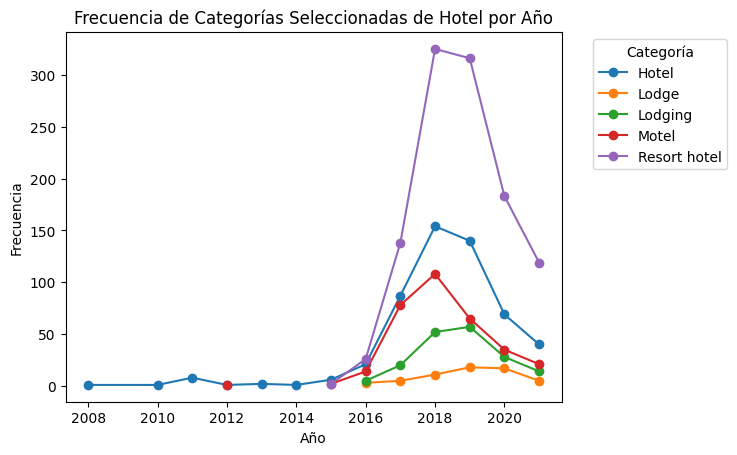

In [73]:
# Filtramos el DataFrame 
selected_categories = ['Resort hotel', 'Hotel', 'Motel', 'Lodge', 'Lodging']
filtered_by_categories = nv_hotels[nv_hotels['category'].isin(selected_categories)]

# Agrupar por año y contar la frecuencia de cada categoría
grouped_by_year = filtered_by_categories.groupby([filtered_by_categories['time'].dt.year, 'category']).size().unstack()

# Crear el gráfico de líneas para cada categoría
plt.figure(figsize=(12, 6))
grouped_by_year.plot(marker='o')
plt.title('Frecuencia de Categorías Seleccionadas de Hotel por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Rating vs Reviews: 

La mayoria de reviews son de 3.5 a 5 estrellas. Lo que da a entender opiniones variadas acerca de los negocios por parte de los clientes.

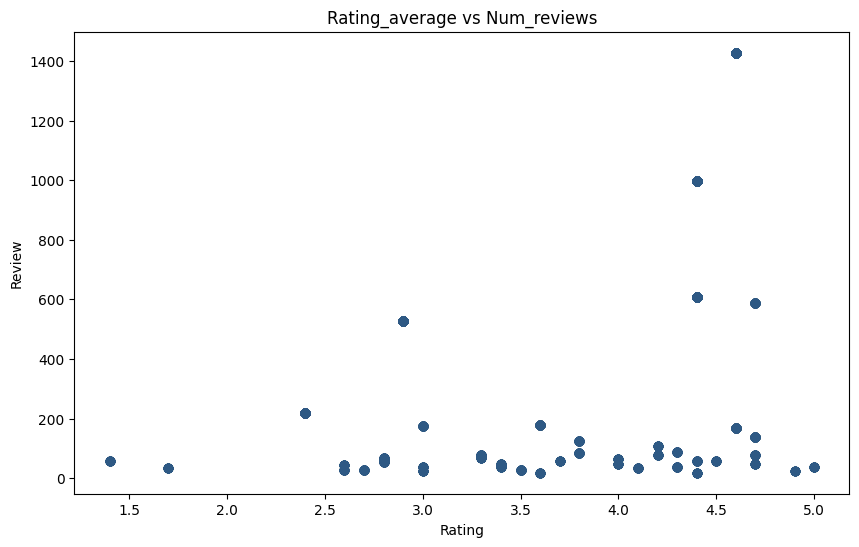

In [79]:
plt.figure(figsize=(10, 6))
plt.scatter(nv_hotels['avg_rating'], nv_hotels['num_of_reviews'], color='#2E5984') #, width=0.25
#sns.violinplot(x=metdat_sitios_fl['stars'], y=metdat_sitios_fl['review_count'], inner="quartile", palette="pastel")
plt.title('Rating_average vs Num_reviews')
plt.xlabel('Rating')
plt.ylabel('Review')
#plt.grid(True)
plt.show()

### Numero de negocios (categoria) de la muestra de google maps en el estado de Nevada.

In [80]:
columns_to_count = ['category']

for column in columns_to_count:
    counts = nv_hotels[column].value_counts()
    print(f"Counts for column '{column}':")
    print(counts)

Counts for column 'category':
category
Resort hotel                  1109
Ski resort                     886
Hot spring hotel               541
Hotel                          531
Motel                          324
Lodging                        176
Extended stay hotel             93
Group accommodation             84
Lodge                           59
Indoor lodging                  48
Pet friendly accommodation      36
Inn                             20
Name: count, dtype: int64


### Verificación de Outliers en rating y reviews

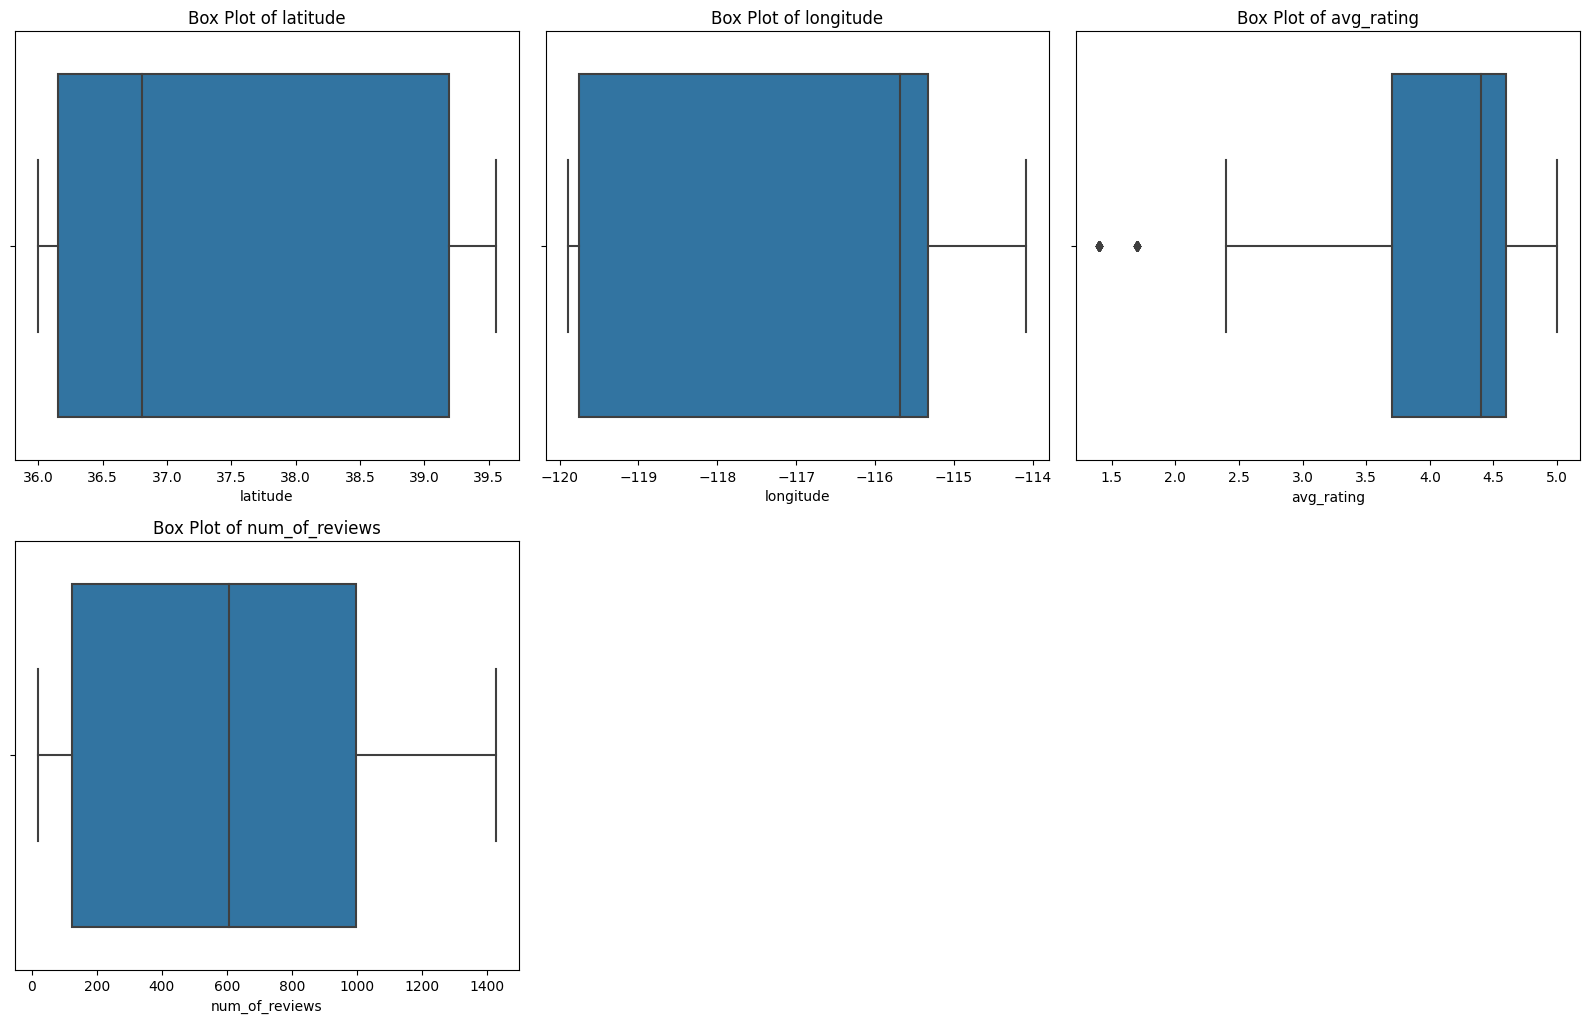

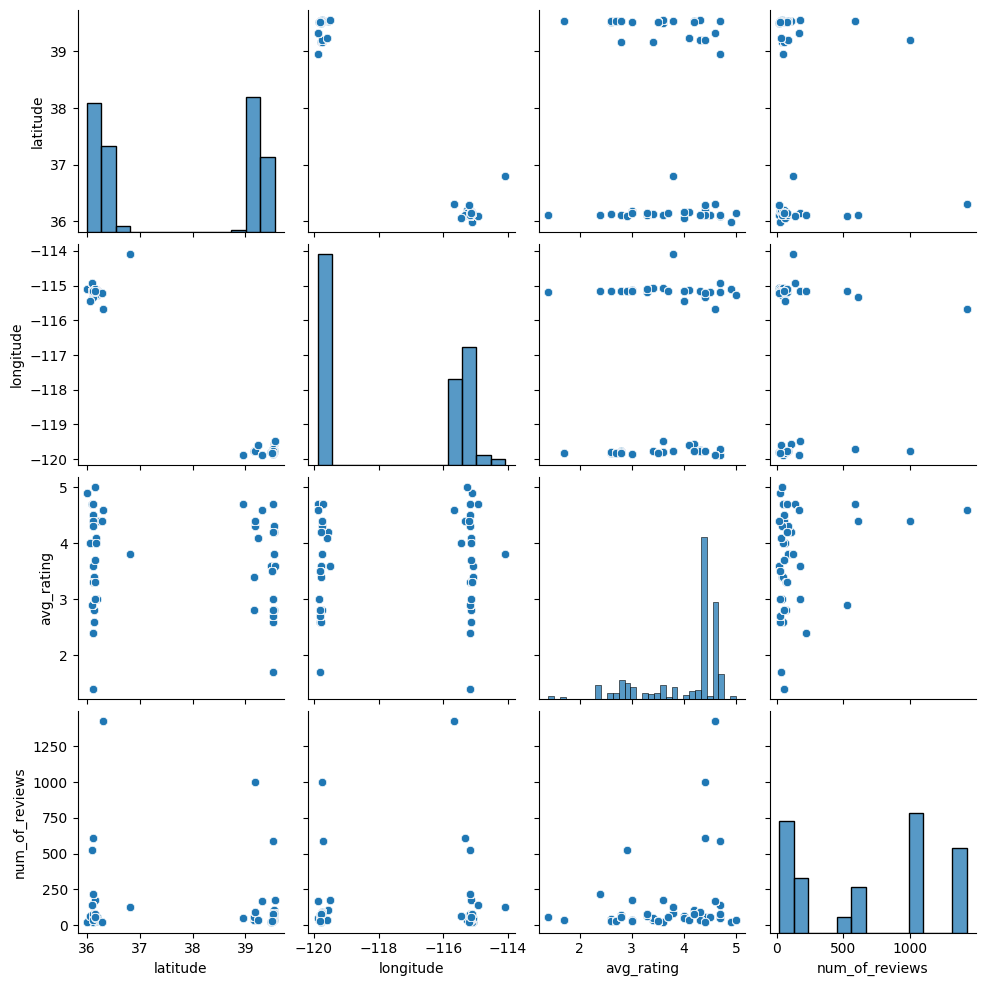

In [81]:
numerical_columns = ['latitude'	,'longitude','avg_rating','num_of_reviews']

# Create subplots for each numerical column
fig = plt.figure(figsize=(16, 15))
for i, column in enumerate(numerical_columns):
    ax = fig.add_subplot(3, 3, i+1)
    sns.boxplot(x=nv_hotels[column], ax=ax)
    ax.set_title(f"Box Plot of {column}")

plt.tight_layout()
plt.show()

# Create scatter plots for pairwise combinations of numerical columns
sns.pairplot(nv_hotelsnv_hotels[numerical_columns])
plt.show()

### Categorías más comentadas:

C:\Users\Coder\AppData\Local\Temp\ipykernel_7332\712366832.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nv_hotels['category'] = nv_hotels['category'].str.title()  # Apply .str.title() to the 'category' Series


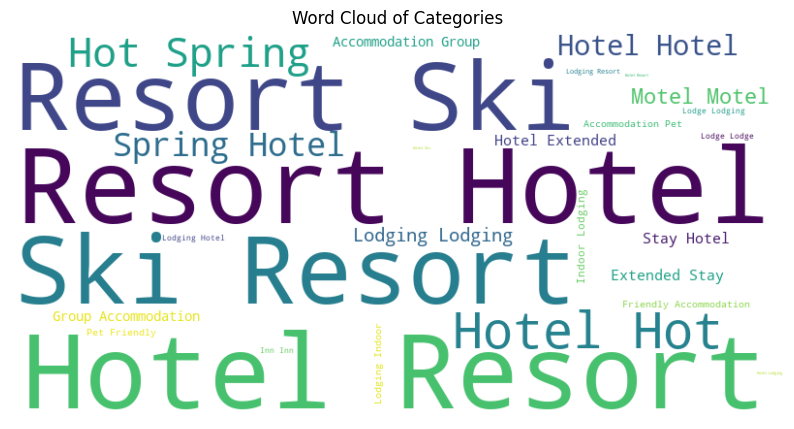

In [82]:
from wordcloud import WordCloud

nv_hotels['category'] = nv_hotels['category'].str.title()  # Apply .str.title() to the 'category' Series
text = ' '.join(nv_hotels['category'].astype(str).tolist())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Categories')
plt.show()